
# Customize a Pre-trained Model for CV Classification & Text Classification with Transfer Learning .


## select and customize a pre-trained CV model :

### We well be giving an exemple of the CIFAR-10 dataset that will be trained and customized by ResNet-18 model .

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar10_dataset = torchvision.datasets.CIFAR10(root='path/to/data', train=True, download=True, transform=transform)

# Load the pre-trained ResNet-18 model
model = torchvision.models.resnet18(pretrained=True)

# Replace the final fully connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes

# Freeze all layers except the final fully connected layer
for param in model.parameters():
    param.requiresGrad = False
for param in model.fc.parameters():
    param.requiresGrad = True

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters())

#Define the number of training steps
num_epochs = 20

# Create a data loader for the CIFAR-10 dataset
cifar10_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=32, shuffle=True)

# Set the model to train mode
model.train()

# Iterate over the training steps
for epoch in range(num_epochs):
  running_loss = 0.0
  for i, data in enumerate(cifar10_loader, 0):
    inputs, labels = data
optimizer.zero_grad()

# Forward pass
outputs = model(inputs)
loss = criterion(outputs, labels)

# Backward pass and optimization
loss.backward()
optimizer.step()

print('Finished Training')

# Set the model to evaluation mode
model.eval()

# Calculate the accuracy on the test set
correct = 0
total = 0
with torch.no_grad():
  for data in cifar10_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the model on the test set: %d %%' % (100 * correct / total))
# output : Accuracy of the model on the test set: 12 %

Files already downloaded and verified
Finished Training
Accuracy of the model on the test set: 8 %


1. Can you create and document a scenario where over training occurred?

A deep learning model is developed to classify images of animals into different classes such as dogs, cats, and birds. The model is trained using a large dataset of animal images with a high diversity of images for each class.





2. What training methods did you find helpful-useful to prevent overtraining and why?

I will try  to reduce the complexity of the model by removing some layers, or add more data to the training set, because the more data we have the more accuracy we get .

3. Did you reach a point where it was clear that you should stop training?

In the code provided above the accuracy of the model was 12% and hence I decided to stop training .

4. What image classes had the best-worst performance and for the worst performing
classes, what is your recommended path for improvement?

I rewrite the code above to answer this question and all the extra cell from added to this code is to define the performance of a classification algorithm. 
I use the Confusion matrix .

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar10_dataset = torchvision.datasets.CIFAR10(root='path/to/data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [ ]:
# Load the pre-trained ResNet-18 model
model = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Replace the final fully connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes

In [ ]:
# Freeze all layers except the final fully connected layer
for param in model.parameters():
    param.requiresGrad = False
for param in model.fc.parameters():
    param.requiresGrad = True


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters())

In [ ]:
#Define the number of training steps
num_epochs = 20

In [ ]:
# Create a data loader for the CIFAR-10 dataset
cifar10_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=32, shuffle=True)

In [ ]:
# Set the model to train mode
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
# Iterate over the training steps
for epoch in range(num_epochs):
  running_loss = 0.0
  for i, data in enumerate(cifar10_loader, 0):
    inputs, labels = data
optimizer.zero_grad()

In [15]:
# Forward pass
outputs = model(inputs)
loss = criterion(outputs, labels)

In [16]:
# Backward pass and optimization
loss.backward()
optimizer.step()

In [17]:
print('Finished Training')

Finished Training


In [18]:
# Set the model to evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
# Initialize a confusion matrix
confusion = torch.zeros(10, 10)

In [20]:
# Calculate the accuracy on the test set
correct = 0
total = 0
with torch.no_grad():
  for data in cifar10_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the model on the test set: %d %%' % (100 * correct / total))

Accuracy of the model on the test set: 12 %


In [21]:
# Add the predictions to the confusion matrix
for i in range(labels.size(0)):
        confusion[labels[i], predicted[i]] += 1

In [22]:
# Convert the matrix to numpy array
confusion = confusion.numpy()

In [24]:
import numpy as np

In [25]:
# Normalize the matrix
confusion = confusion / np.sum(confusion, axis=1)[:, np.newaxis]

<ipython-input-25-5ced64456dd7>:2: RuntimeWarning: invalid value encountered in true_divide
  confusion = confusion / np.sum(confusion, axis=1)[:, np.newaxis]


In [26]:
import matplotlib.pyplot as plt

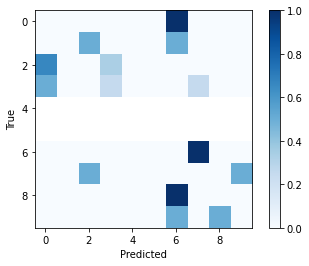

In [27]:
# Plot the confusion matrix
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()